# Magistère 2A INTRODUCTION AU MACHINE LEARNING
## TP 3 : Apprentissage via scikit-learn

## Objectifs du TP

Dans ce TP, on utilisera la base `titanic`.

## Chargement de la base et sélection des données

* Téléchargez la base *titanic.csv* et chargez-la dans un DataFrame (pandas), noté *df* (pandas).
* Affichez les attributs de la base et leur nombre. De quel type sont-ils (réels, nominaux ou variables binaires,...) ? Combien y a-t-il de classes ?
*  vous devez maintenant nettoyer la base :
    * Retirer les colonnes qui vous semblent inutiles pour l'apprentissage à l'aide de *df.drop(index)*
    * Certaines variables sont nominatives et scikit learn ne traite que des variables numériques. Transformer les variables numériques en variables binaires à de *pandas.get\_dummies*
    * remplacer les valeurs nan par la moyenne à l'aide de *df.fillna*
* Afin de créer une base d'apprentissage et une base de test, créez une fonction *split(df,p)* qui séparera et retournera deux DataFrames, notés *train* et *test* dont la taille est déterminée par un pourcentage *p* passé en paramètre (60/40%, 70/30%,...). Appliquez la fonction à *df*.

In [1]:
import os
import pandas as pds
import numpy as np
from matplotlib.pyplot import *
import matplotlib.gridspec as gridspec

pds.set_option('display.max_columns', None)
df = pds.read_csv((os.path.join("data", "titanic.csv")))

df = pds.concat([df, df.Cabin.str.get_dummies()], axis=1)
df = pds.concat([df, df.Embarked.str.get_dummies()], axis=1)
df = pds.concat([df, df.Sex.str.get_dummies()], axis=1)

# Il existe des trous de donnees concernant la variable Age, 
# on donne alors la moyenne des ages pour remplir les cases manquantes
df.Age = df.Age.fillna( np.nanmean(df.Age.values) )

# On suppose que le nom et l'identifiant des passagers n'aura pas d'impact, 
# pareil pour l'identification du ticket.
# on supprime les variables transformees en dummies.
df = df.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked','Sex'], axis=1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,A34,A36,A5,A6,A7,B101,B102,B18,B19,B20,B22,B28,B3,B30,B35,B37,B38,B39,B4,B41,B42,B49,B5,B50,B51 B53 B55,B57 B59 B63 B66,B58 B60,B69,B71,B73,B77,B78,B79,B80,B82 B84,B86,B94,B96 B98,C101,C103,C104,C106,C110,C111,C118,C123,C124,C125,C126,C128,C148,C2,C22 C26,C23 C25 C27,C30,C32,C45,C46,C47,C49,C50,C52,C54,C62 C64,C65,C68,C7,C70,C78,C82,C83,C85,C86,C87,C90,C91,C92,C93,C95,C99,D,D10 D12,D11,D15,D17,D19,D20,D21,D26,D28,D30,D33,D35,D36,D37,D45,D46,D47,D48,D49,D50,D56,D6,D7,D9,E10,E101,E12,E121,E17,E24,E25,E31,E33,E34,E36,E38,E40,E44,E46,E49,E50,E58,E63,E67,E68,E77,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T,C,Q,S,female,male
0,0,3,22.000000,1,0,7.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,3,26.000000,0,0,7.9250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1,1,35.000000,1,0,53.1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,3,35.000000,0,0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
888,0,3,29.699118,1,2,23.4500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
889,1

In [2]:
def split(df,p):
    """p is the proportion of the dataset to use as train base (between 0 & 1)"""
    index_split = np.split(df.index, [int(p*df.shape[0])])
    train = df.iloc[index_split[0]]
    test = df.iloc[index_split[1]]
    return train, test

## Familiarisation avec quelques méthodes du package *scikit-learn*+
On utilisera les fonctions d'apprentissage bayésien naïf de *scikit-learn* pour prédire la classe de la base *test* créée précédemment lorsque le modèle prédictif est calculé à partir de la base d'apprentissage *train*. Pour cela, vous aurez besoin des fonctions:

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.model_selection import cross_val_score

S'aider de l'aide en ligne (http://scikit-learn.org) pour l'utilisation de la méthode.
* Quels sont les paramètres de réglage de la méthode ?
* Créez une fonction *prediction(labels,pred)* qui renverra le taux de prédiction (en %) pour une prédiction stockée dans *pred* et les valeurs souhaitées stockées dans *labels*. On calculera le taux de prédiction de l'apprentissage bayésien naïf sur la base *test*.
* Répétez les questions précédentes avec la méthode des arbres de décision (DecisionTreeClassifier). 

In [4]:
def prediction(clf, Xtrain, Ytrain, Xtest, Ytest):
    clf.fit(Xtrain, Ytrain)
    return clf.score(Xtest,Ytest)

In [5]:
label = 'Survived'
p = 0.6

In [6]:
train, test = split(df,p)

Xtrain = train.drop(label, axis=1)
Ytrain = train[label]

Xtest = test.drop(label, axis=1)
Ytest = test[label]

Les paramètres intéressants :
sklearn.naive_bayes.GaussianNB(var_smoothing)
 - var_smoothing permet d'ajuster la variance utilisée dans le calcul de la probabilité conditionnelle avec la formule de Bayes.

In [7]:
clf = GaussianNB()
prediction(clf, Xtrain, Ytrain, Xtest, Ytest)

0.6610644257703081

Les paramètres intéréssants : sklearn.tree.DecisionTreeClassifier(min_samples_leaf)
 - min_samples_leaf indique à quel point l'arbre est complexe, cela donne le minimum d'exemples à inclure sur chaque feuille de l'arbre.

In [8]:
clf = DecisionTreeClassifier()
prediction(clf, Xtrain, Ytrain, Xtest, Ytest)

0.7871148459383753

* Mêmes questions ensuite avec la méthode des *k* plus proches voisins et la regression logistique. Voir l'aide en ligne pour un descriptif de l'utilisation des méthodes. A chaque fois, précisez bien quels sont les paramètres de la méthode.


Les paramètres intéressants : sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights)
 - n_neighbors indique sur combien de voisins se base-t-on pour executer l'algorithme (5 par defaut),
 - weights indique le poids que prendra chaque voisin pour la prédiction.

In [9]:
clf = KNeighborsClassifier()

# on normalise pour palier les differences d'intervalles entre variables
normalize(Xtrain)
normalize(Xtest)

prediction(clf, Xtrain, Ytrain, Xtest, Ytest)

0.7282913165266106

Les paramètres intéressants : sklearn.linear_model.LogisticRegression(C, solver)
 - C est là pour éviter l'overfitting, il permet de pénaliser les poids trop fort afin de régulariser les données,
 - solver indique l'algorithme à utiliser pour la classification.

In [10]:
# on ajoute max_iter = 10000 ce qui prend plus de temps mais qui semble assurer la convergence 
# de l'algorithme d'optimisation

clf = LogisticRegression(max_iter=10000)
prediction(clf, Xtrain, Ytrain, Xtest, Ytest)

0.7843137254901961

## Recherche des paramètres optimaux
Pour chacune des méthodes, utilisez la fonction *split* pour séparer la base en deux DataFrames de taille équivalente (*train* et *test*). Recherchez ensuite les paramètres optimaux qui vous donneront le meilleur taux de prédiction sur *test* lorsque le modèle apprend les données de *train*. Pour cela, utilisez une grille de valeurs pour les paramètres et pour chaque valeur de la grille, calculez le taux de prédiction sur *test* lorsque vous apprenez *train*. Retenez les valeurs de paramètres donnant le meilleur taux. Les bornes de valeurs et le pas de la grille sont à déterminer de façon empirique.

In [11]:
param_GaussianNB = np.array([GaussianNB(var_smoothing=1e-12),
                            GaussianNB(var_smoothing=1e-9),
                            GaussianNB(var_smoothing=1e-5),
                            GaussianNB(var_smoothing=1e-1),])

# on ajoute max_iter = 10000 ce qui prend plus de temps mais qui semble assurer la convergence 
# de l'algorithme d'optimisation
param_LogisticRegression = np.array([
    LogisticRegression(C=0.5, solver='newton-cg', max_iter=10000),
    LogisticRegression(C=0.5, solver='lbfgs', max_iter=10000), 
    LogisticRegression(C=0.5, solver='liblinear', max_iter=10000), 
    LogisticRegression(C=0.5, solver='sag', max_iter=10000),
    LogisticRegression(C=0.5, solver='saga', max_iter=10000),
    LogisticRegression(C=1, solver='newton-cg', max_iter=10000),
    LogisticRegression(C=1, solver='lbfgs', max_iter=10000), 
    LogisticRegression(C=1, solver='liblinear', max_iter=10000), 
    LogisticRegression(C=1, solver='sag', max_iter=10000),
    LogisticRegression(C=1, solver='saga', max_iter=10000),
    LogisticRegression(C=2, solver='newton-cg', max_iter=10000),
    LogisticRegression(C=2, solver='lbfgs', max_iter=10000), 
    LogisticRegression(C=2, solver='liblinear', max_iter=10000), 
    LogisticRegression(C=2, solver='sag', max_iter=10000),
    LogisticRegression(C=2, solver='saga', max_iter=10000),
    LogisticRegression(C=5, solver='newton-cg', max_iter=10000),
    LogisticRegression(C=5, solver='lbfgs', max_iter=10000), 
    LogisticRegression(C=5, solver='liblinear', max_iter=10000), 
    LogisticRegression(C=5, solver='sag', max_iter=10000),
    LogisticRegression(C=5, solver='saga', max_iter=10000)])
    
param_KNeighborsClassifier =  np.array([
    KNeighborsClassifier(n_neighbors=2,weights='uniform'),
    KNeighborsClassifier(n_neighbors=2,weights='distance'),
    KNeighborsClassifier(n_neighbors=5,weights='uniform'),
    KNeighborsClassifier(n_neighbors=5,weights='distance'),
    KNeighborsClassifier(n_neighbors=10,weights='uniform'),
    KNeighborsClassifier(n_neighbors=10,weights='distance')])
    
param_DecisionTreeClassifier =  np.array([
    DecisionTreeClassifier(min_samples_leaf=1),
    DecisionTreeClassifier(min_samples_leaf=5),
    DecisionTreeClassifier(min_samples_leaf=10)])

In [12]:
score_opti = [0,0,0,0]
opti = ['','','','']
L =  [param_GaussianNB, param_LogisticRegression, param_KNeighborsClassifier, param_DecisionTreeClassifier]

for i in range(len(L)):
    for j in range(len(L[i])):
        clf = L[i][j]
        score_prediction = prediction(clf, Xtrain, Ytrain, Xtest, Ytest)
        if score_prediction > score_opti[i] :
            score_opti[i] = score_prediction
            opti[i] = clf
            
print('\nGaussianNB:','\nscore:',score_opti[0], '\nparametres:',opti[0])
print('\nLogisticRegression:','\nscore:',score_opti[1], '\nparametres:',opti[1])
print('\nKNeighborsClassifier:','\nscore:',score_opti[2], '\nparametres:',opti[2])
print('\nDecisionTreeClassifier:','\nscore:',score_opti[3], '\nparametres:',opti[3])


GaussianNB: 
score: 0.7226890756302521 
parametres: GaussianNB(priors=None, var_smoothing=1e-05)

LogisticRegression: 
score: 0.7955182072829131 
parametres: LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

KNeighborsClassifier: 
score: 0.7282913165266106 
parametres: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

DecisionTreeClassifier: 
score: 0.8151260504201681 
parametres: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrea

## Comparaison des méthodes par validation croisée
Pour chacune des méthodes et en utilisant les paramètres optimaux déterminés précédemment, réalisez une procédure de validation croisée pour calculer le taux de prédiction moyen et sa variance lorsque le nombre de folds est 5. Pour cela, vous aurez besoin de la fonction cross_val_score.

In [13]:
# on realise la validation croisee sur la base test :
scores = []
for clf in opti:
    scores.append(cross_val_score(clf, Xtest, Ytest, cv=5))
    
print('\nGaussianNB:','\nscores sur les 5 folds:',scores[0])
print('\nLogisticRegression:','\nscores sur les 5 folds:',scores[1])
print('\nKNeighborsClassifier:','\nscores sur les 5 folds:',scores[2])
print('\nDecisionTreeClassifier:','\nscores sur les 5 folds:',scores[3])


GaussianNB: 
scores sur les 5 folds: [0.73611111 0.69444444 0.73239437 0.74647887 0.73239437]

LogisticRegression: 
scores sur les 5 folds: [0.76388889 0.77777778 0.81690141 0.76056338 0.85915493]

KNeighborsClassifier: 
scores sur les 5 folds: [0.66666667 0.75       0.70422535 0.78873239 0.73239437]

DecisionTreeClassifier: 
scores sur les 5 folds: [0.72222222 0.77777778 0.71830986 0.76056338 0.81690141]


Elle vous donnera les taux de prédiction pour chacun des folds de tests (voir procédure de validation croisée et l'aide en ligne http://scikit-learn.org).

## Affichage des résultats
On souhaite présenter graphiquement le résultat de la validation croisée ainsi que la comparaison des performances des méthodes. Pour cela on utilisera l'environnement *pyplot* de *matplotlib* :
* Pour chacune des 4 méthodes utilisées, affichez un *subplot* qui représentera un diagramme en barres des 5 taux de prédiction correspondants à chacun des folds de la validation croisée (vous pouvez utiliser les paramètres optimaux trouvés précédemment pour cela). Les 4 subplots seront affichés de manière à obtenir 2 niveaux de 2 subplots. Pour cela, vous aurez besoin des fonctions subplot et bar.

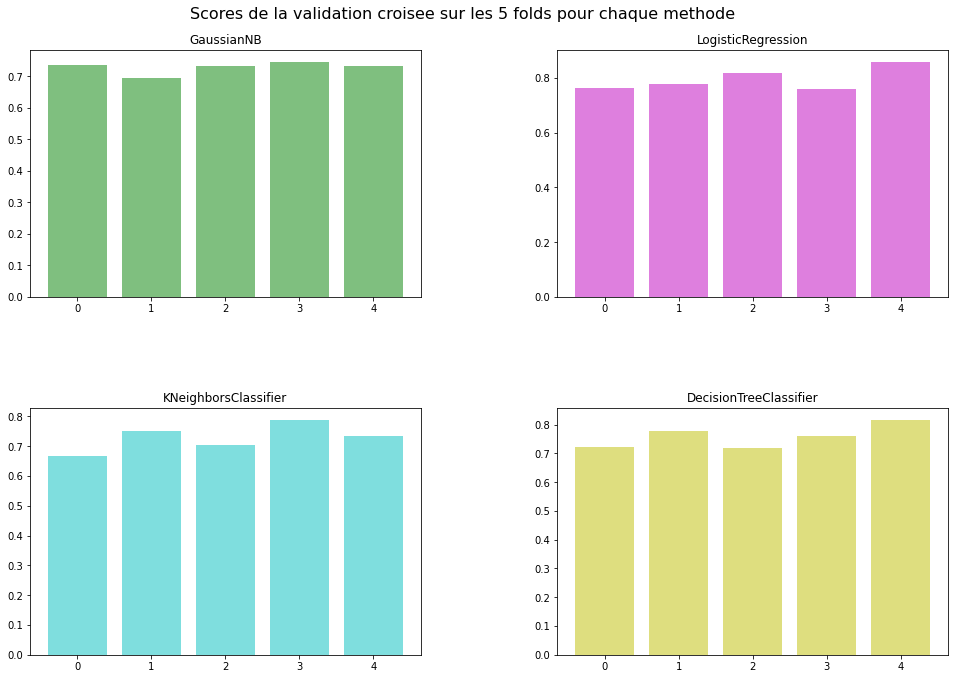

In [14]:
fig = figure(figsize=(15,10))
fig.suptitle('Scores de la validation croisee sur les 5 folds pour chaque methode', fontsize=16)
gs = gridspec.GridSpec(2, 2, figure=fig)
labels = ['fold 1', 'fold 2', 'fold 3', 'fold 4', 'fold 5']

ax1 = fig.add_subplot(gs[0, 0])
ax1.bar(x=np.arange(len(labels)), height=scores[0], align='center', alpha=0.5, color='g')
ax1.set_title('GaussianNB')

ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(x=np.arange(len(labels)), height=scores[1], align='center', alpha=0.5, color='m')
ax2.set_title('LogisticRegression')

ax3 = fig.add_subplot(gs[1, 0])
ax3.bar(x=np.arange(len(labels)), height=scores[2], align='center', alpha=0.5, color='c')
ax3.set_title('KNeighborsClassifier')

ax4 = fig.add_subplot(gs[1, 1])
ax4.bar(x=np.arange(len(labels)), height=scores[3], align='center', alpha=0.5, color='y')
ax4.set_title('DecisionTreeClassifier')

subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.35)

show()

* Affichez ensuite un diagramme de 4 barres correspondant aux 4 méthodes où chaque barre représente le taux moyen de prédiction issu de la validation croisée pour une méthode (toujours avec les paramètres optimaux). Comparez.

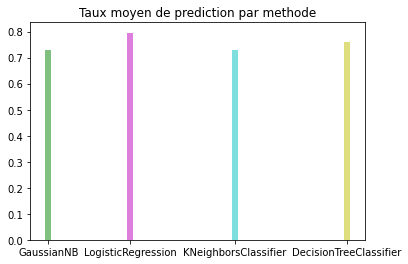

In [15]:
mean_scores = np.mean(scores, axis=1)

bar(x=[0,11,25,40], height=mean_scores, align='center', alpha=0.5, color=['g', 'm', 'c', 'y'])
title('Taux moyen de prediction par methode')
xticks([0,11,25,40],['GaussianNB', 'LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier'])

show()

La régression logistique semble donner les meilleurs résultats sur nos données tandis que la méthode bayésienne gaussienne naïve est moins performante.

La régression logistique est une méthode de classification utilisée pour la prédiction linéaire d'une variable discrète. Notre problème étant bien traité par ce classifieur, il est probablement linéaire, il est donc normal que la régression logistique soit la méthode de prédiciton la plus adaptée.

La régression bayésienne gaussienne, elle, n'est pas très performante ici. C'est probablement du aux hypothèses naïves d'indépendance faites alors que les variables de nos données sont probablement dépendantes les unes des autres.

## Bonus
Vous êtes encouragés à :
* créer de nouveaux attributs à partir des attributs nominaux que vous n'aurez pas utilisé
* tester d'autres algorithmes

In [16]:
df_new = pds.read_csv((os.path.join(".", "titanic.csv")))

df_new = pds.concat([df_new, df_new.Cabin.str.get_dummies()], axis=1)
df_new = pds.concat([df_new, df_new.Embarked.str.get_dummies()], axis=1)
df_new = pds.concat([df_new, df_new.Sex.str.get_dummies()], axis=1)

df_new.Age = df_new.Age.fillna( np.nanmean(df_new.Age.values) )

df_new = df_new.drop(columns=['PassengerId','Ticket','Cabin','Embarked','Sex'], axis=1)
df_new

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,A10,A14,A16,...,F33,F38,F4,G6,T,C,Q,S,female,male
0,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,71.2833,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,3,"Allen, Mr. William Henry",35.000000,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.000000,0,0,13.0000,0,0,0,...,0,0,0,0,0,0,0,1,0,1
887,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,1,1,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,23.4500,0,0,0,...,0,0,0,0,0,0,0,1,1,0
889,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,30.0000,0,0,0,...,0,0,0,0,0,1,0,0,0,1


Nous avons supprimé des données la variable Name. Néanmoins, dans cette variable apparaît le statut de chaque passager : révérant, monsieur, madame, mademoiselle, docteur...
Nous pouvons imaginer que cette variable puisse apporter quelque chose à notre modèle.
Tentons de refaire l'exercice en gardant cette variable :

In [17]:
def name_status(s):
    start = s.find(", ") + len(", ")
    end = s.find(". ")
    substring = s[start:end]
    return substring

new_Name = df_new.Name.apply(lambda row: name_status(row))
df_new.Name = new_Name

df_new = pds.concat([df_new, df_new.Name.str.get_dummies()], axis=1)
df_new = df_new.drop(columns=['Name'], axis=1)
df_new

,Survived,Pclass,Age,SibSp,Parch,Fare,A10,A14,A16,A19,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,0,3,22.000000,1,0,7.2500,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,38.000000,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,35.000000,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,3,35.000000,0,0,8.0500,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
887,1,1,19.000000,0,0,30.0000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
888,0,3,29.699118,1,2,23.4500,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
889,1,1,26.000000,0,0,30.0000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


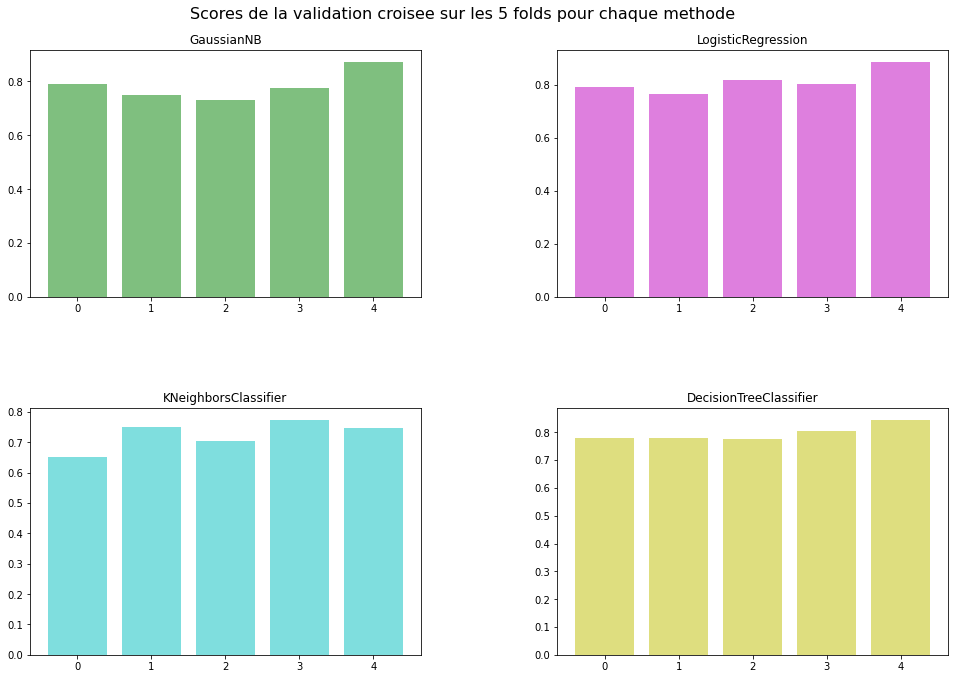

In [19]:
label = 'Survived'
p = 0.6

train, test = split(df_new,p)

Xtrain = train.drop(label, axis=1)
Ytrain = train[label]

Xtest = test.drop(label, axis=1)
Ytest = test[label]

score_opti = [0,0,0,0]
opti = ['','','','']
L =  [param_GaussianNB, param_LogisticRegression, param_KNeighborsClassifier, param_DecisionTreeClassifier]

for i in range(len(L)):
    for j in range(len(L[i])):
        clf = L[i][j]
        score_prediction = prediction(clf, Xtrain, Ytrain, Xtest, Ytest)
        if score_prediction > score_opti[i] :
            score_opti[i] = score_prediction
            opti[i] = clf
            
scores = []
for clf in opti:
    scores.append(cross_val_score(clf, Xtest, Ytest, cv=5))

fig = figure(figsize=(15,10))
fig.suptitle('Scores de la validation croisee sur les 5 folds pour chaque methode', fontsize=16)
gs = gridspec.GridSpec(2, 2, figure=fig)
labels = ['fold 1', 'fold 2', 'fold 3', 'fold 4', 'fold 5']

ax1 = fig.add_subplot(gs[0, 0])
ax1.bar(x=np.arange(len(labels)), height=scores[0], align='center', alpha=0.5, color='g')
ax1.set_title('GaussianNB')

ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(x=np.arange(len(labels)), height=scores[1], align='center', alpha=0.5, color='m')
ax2.set_title('LogisticRegression')

ax3 = fig.add_subplot(gs[1, 0])
ax3.bar(x=np.arange(len(labels)), height=scores[2], align='center', alpha=0.5, color='c')
ax3.set_title('KNeighborsClassifier')

ax4 = fig.add_subplot(gs[1, 1])
ax4.bar(x=np.arange(len(labels)), height=scores[3], align='center', alpha=0.5, color='y')
ax4.set_title('DecisionTreeClassifier')

subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.35)

show()

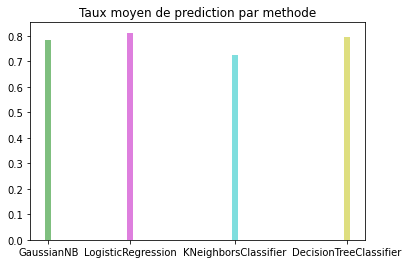

In [20]:
mean_scores = np.mean(scores, axis=1)

bar(x=[0,11,25,40], height=mean_scores, align='center', alpha=0.5, color=['g', 'm', 'c', 'y'])
title('Taux moyen de prediction par methode')
xticks([0,11,25,40],['GaussianNB', 'LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier'])

show()

Après l'ajout de la donnée concernant le statut des passagers les scores sont en moyenne les mêmes, probablement à peine plus élevés maintenant. Cette information supplémentaire n'apporte pas énormément au modèle. Néanmois cette fois, c'est la méthode des plus proches voisins qui semble la moins efficace et la régression bayésienne gaussienne semble cette fois très bien fonctionner.